# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\Alex\AppData\Local\Temp\ipykernel_13688\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


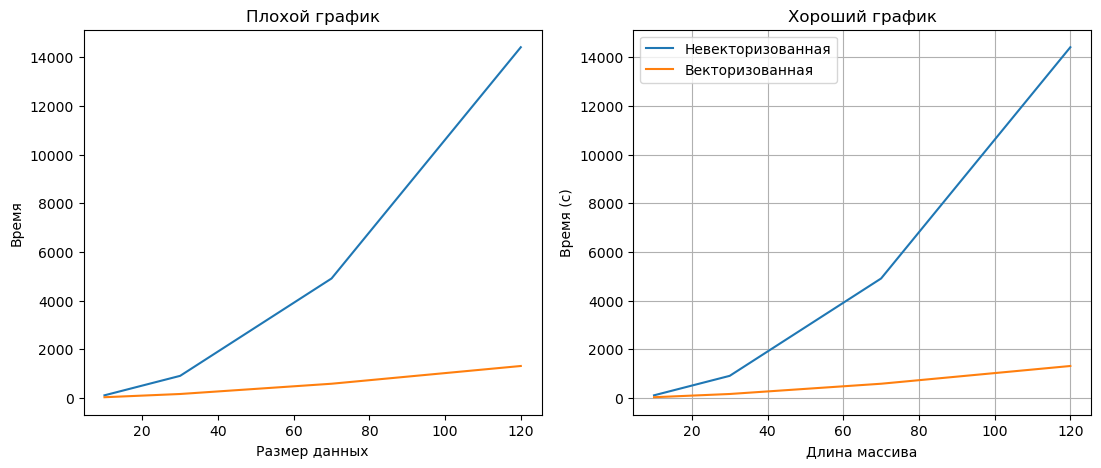

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

C:\Users\Alex\AppData\Local\Temp\ipykernel_13688\4189381065.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


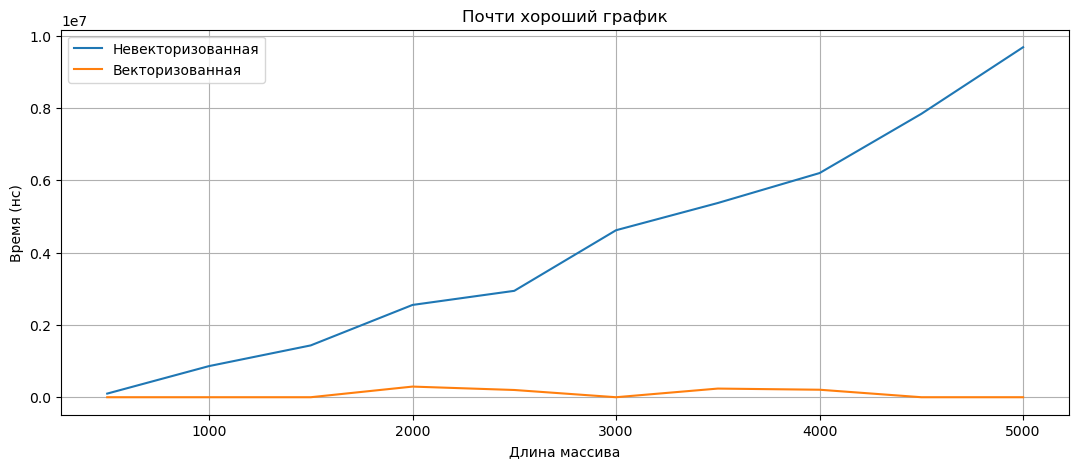

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import time
from functions import prod_non_zero_diag as f
from functions_vectorized import prod_non_zero_diag as fv

%matplotlib inline

data_size = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
time_f = []
time_fv = []
for n in data_size:
    sum_time_f=0
    sum_time_fv=0
    for _ in range(5):
        a=[[0] * n for i in range(n)]
        for i in range(n):
            for j in range(n):
                a[i][j]=rnd.randint(-100000, 100000)
        np_a=np.array(a);
        #print(b)

        sum_time_f += -time.time_ns()
        f(a, n)
        sum_time_f += time.time_ns()

        sum_time_fv += -time.time_ns()
        fv(np_a)
        sum_time_fv += time.time_ns()
        
    time_f.append(sum_time_f/5)
    time_fv.append(sum_time_fv/5)

f, (pic) = plt.subplots(1, 1, figsize=(13, 5))

pic.plot(data_size, time_f, label=u"Невекторизованная")
pic.plot(data_size, time_fv, label=u"Векторизованная")
pic.set_title(u"Почти хороший график")
pic.set_xlabel(u"Длина массива")
pic.set_ylabel(u"Время (нс)")
pic.grid()
pic.legend()

f.show()  


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


C:\Users\Alex\AppData\Local\Temp\ipykernel_13688\2857786209.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


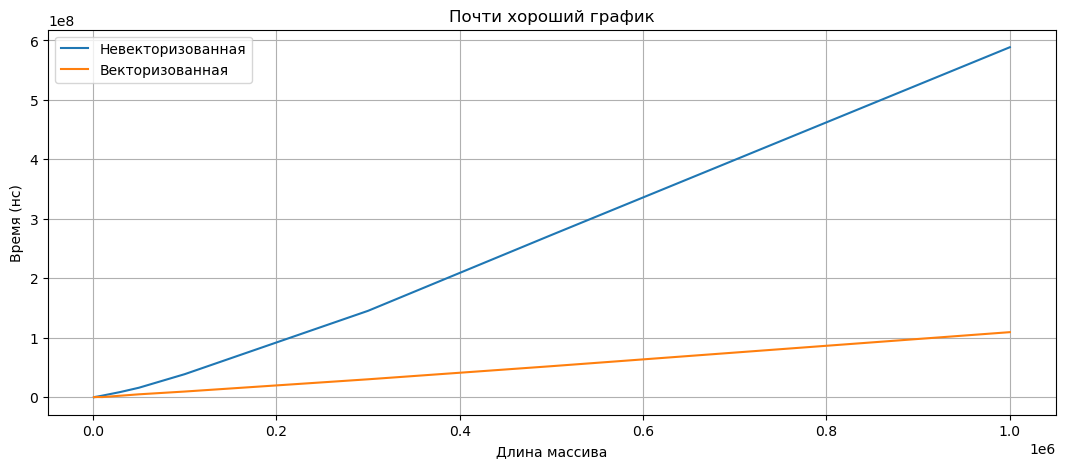

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import time
from functions import are_multisets_equal as f
from functions_vectorized import are_multisets_equal as fv

%matplotlib inline

data_size = [1000, 3000, 5000, 10000, 30000, 50000, 100000, 300000, 500000, 1000000]
time_f = []
time_fv = []
for n in data_size:
    sum_time_f=0
    sum_time_fv=0
    for _ in range(5):
        a=[0] * n
        b=[0] * n
        for i in range(n):
            a[i]=rnd.randint(-1000000000, 1000000000)
            b[i]=rnd.randint(-1000000000, 1000000000)   
        np_a=np.array(a)
        np_b=np.array(b)

        sum_time_f += -time.time_ns()
        f(a, b)
        sum_time_f += time.time_ns()

        sum_time_fv += -time.time_ns()
        fv(np_a, np_b)
        sum_time_fv += time.time_ns()

    time_f.append(sum_time_f/5)
    time_fv.append(sum_time_fv/5)

f, (pic) = plt.subplots(1, 1, figsize=(13, 5))

pic.plot(data_size, time_f, label=u"Невекторизованная")
pic.plot(data_size, time_fv, label=u"Векторизованная")
pic.set_title(u"Почти хороший график")
pic.set_xlabel(u"Длина массива")
pic.set_ylabel(u"Время (нс)")
pic.grid()
pic.legend()

f.show()  

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

C:\Users\Alex\AppData\Local\Temp\ipykernel_13688\2521308761.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


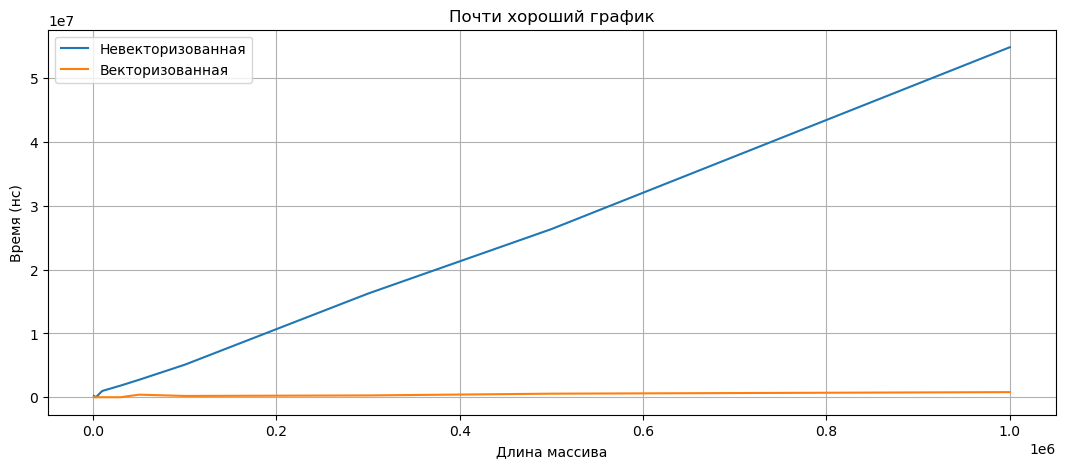

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import time
from functions import max_after_zero as f
from functions_vectorized import max_after_zero as fv

%matplotlib inline

data_size = [1000, 3000, 5000, 10000, 30000, 50000, 100000, 300000, 500000, 1000000]
time_f = []
time_fv = []
for n in data_size:
    sum_time_f=0
    sum_time_fv=0
    for _ in range(5):
        a=[0] * n
        for i in range(n):
            a[i]=rnd.randint(0, 100)
        np_a=np.array(a)
        #print(np_a)
        
        sum_time_f += -time.time_ns()
        f(a, n)
        sum_time_f += time.time_ns()

        sum_time_fv += -time.time_ns()
        fv(np_a) 
        sum_time_fv += time.time_ns()

    time_f.append(sum_time_f/5)
    time_fv.append(sum_time_fv/5)

f, (pic) = plt.subplots(1, 1, figsize=(13, 5))

pic.plot(data_size, time_f, label=u"Невекторизованная")
pic.plot(data_size, time_fv, label=u"Векторизованная")
pic.set_title(u"Почти хороший график")
pic.set_xlabel(u"Длина массива")
pic.set_ylabel(u"Время (нс)")
pic.grid()
pic.legend()

f.show()  

* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


time non-vectorized: 3349327000 ns
time vectorized: 19175900 ns


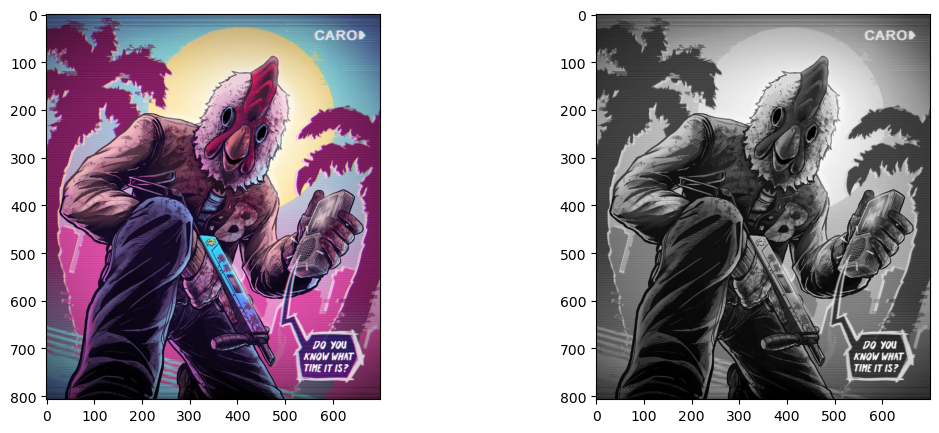

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import time
from functions import convert_image as f
from functions_vectorized import convert_image as fv
from PIL import Image

coefs = np.array([0.299, 0.587, 0.114])
np_image = np.asarray(Image.open('HM.jpg').convert('RGB'))
image = np.asarray(np_image)

time_f = -time.time_ns()
image_f = f(image, coefs)
time_f += time.time_ns()

time_fv = -time.time_ns()
image_fv = fv(np_image, coefs)
time_fv += time.time_ns()

print("time non-vectorized: {} ns".format(time_f))
print("time vectorized: {} ns".format(time_fv))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

img1 = Image.open("HM.jpg")
ax1.imshow(img1)
img2 = Image.fromarray(np.array(image_fv))
ax2.imshow(img2)

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

C:\Users\Alex\AppData\Local\Temp\ipykernel_13688\953568326.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


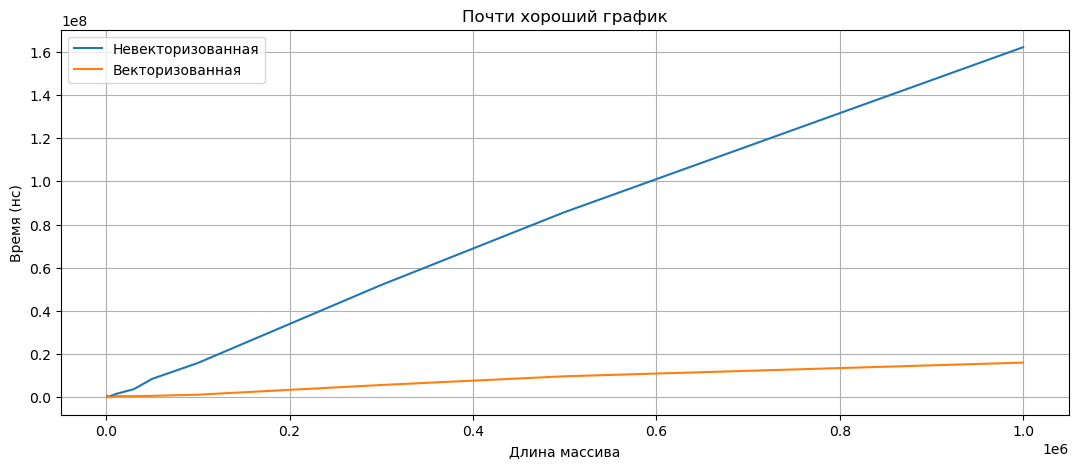

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import time
from functions import run_length_encoding as f
from functions_vectorized import run_length_encoding as fv

%matplotlib inline

data_size = [1000, 3000, 5000, 10000, 30000, 50000, 100000, 300000, 500000, 1000000]
time_f = []
time_fv = []
for n in data_size:
    sum_time_f=0
    sum_time_fv=0
    for _ in range(5):
        a=[0] * n
        for i in range(n):
            a[i]=rnd.randint(-1000000000, 1000000000)
        np_a=np.array(a)

        sum_time_f += -time.time_ns()
        f(a, n)
        sum_time_f += time.time_ns()

        sum_time_fv += -time.time_ns()
        fv(np_a)
        sum_time_fv += time.time_ns()

    time_f.append(sum_time_f/5)
    time_fv.append(sum_time_fv/5)

f, (pic) = plt.subplots(1, 1, figsize=(13, 5))

pic.plot(data_size, time_f, label=u"Невекторизованная")
pic.plot(data_size, time_fv, label=u"Векторизованная")
pic.set_title(u"Почти хороший график")
pic.set_xlabel(u"Длина массива")
pic.set_ylabel(u"Время (нс)")
pic.grid()
pic.legend()

f.show()  

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

C:\Users\Alex\AppData\Local\Temp\ipykernel_13688\2495342738.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


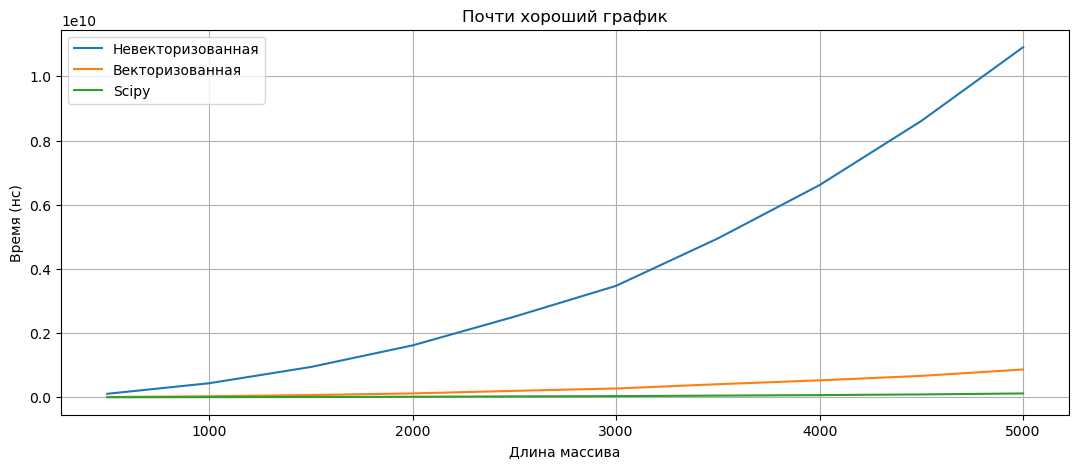

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import random as rnd
import time
from functions import pairwise_distance as f
from functions_vectorized import pairwise_distance as fv

%matplotlib inline

data_size = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
time_f = []
time_fv = []
time_scipy = []
for n in data_size:
    sum_time_f=0
    sum_time_fv=0
    sum_time_scipy=0
    for _ in range(5):
        a=[0] * n
        b=[0] * n
        for i in range(n):
            a[i]=[rnd.randint(-1000, 1000), rnd.randint(-1000, 1000)]
            b[i]=[rnd.randint(-1000, 1000), rnd.randint(-1000, 1000)]
        np_a=np.array(a)
        np_b=np.array(b)

        sum_time_f += -time.time_ns()
        f(a, b)
        sum_time_f += time.time_ns()

        sum_time_fv += -time.time_ns()
        fv(np_a, np_b)
        sum_time_fv += time.time_ns()
        
        sum_time_scipy += -time.time_ns()
        cdist(np_a, np_b)
        sum_time_scipy += time.time_ns()

    time_f.append(sum_time_f/5)
    time_fv.append(sum_time_fv/5)
    time_scipy.append(sum_time_scipy/5)

f, (pic) = plt.subplots(1, 1, figsize=(13, 5))

pic.plot(data_size, time_f, label=u"Невекторизованная")
pic.plot(data_size, time_fv, label=u"Векторизованная")
pic.plot(data_size, time_scipy, label=u"Scipy")
pic.set_title(u"Почти хороший график")
pic.set_xlabel(u"Длина массива")
pic.set_ylabel(u"Время (нс)")
pic.grid()
pic.legend()

f.show()  

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

# Отчет

### Numpy
Разбираться с __numpy__ было относительно интересно, хотя постоянные ошибки вылезающие из ничего, бесят:)

### Реализации
Векторная реализация оказалась сильно _быстрее_, чем невекторизированная.